In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fs = 16000
N = 1e5
amp = 50
freq = 1000
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
b, a = signal.butter(2, 0.25, 'low')
x = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
y = signal.lfilter(b, a, x)
x += amp*np.sin(2*np.pi*freq*time)
y += np.random.normal(scale=0.1*np.sqrt(noise_power), size=time.shape)

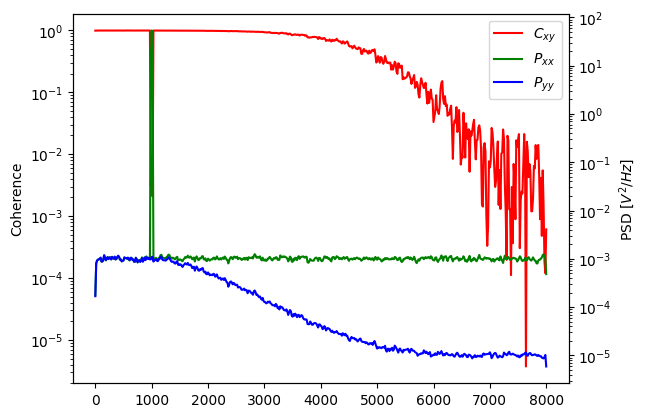

In [12]:
# 计算 x 与 y 的幅度平方相关估计
f, Cxy = signal.coherence(x, y, fs, nperseg=1024)

# 使用 welch 方法分别计算 x 与 y 各自的功率谱密度估计
f, Pxx = signal.welch(x, fs, nperseg=1024)
f, Pyy = signal.welch(y, fs, nperseg=1024)

# 下面绘制结果
lnxy = plt.semilogy(f, Cxy, color='r', label='$C_{xy}$')
plt.ylabel('Coherence')

# 绘制第二个 y 轴，用于标注 x 与 y 的功率谱密度估计
plt.twinx()
lnx = plt.semilogy(f, Pxx, color='g', label="$P_{xx}$")
lny = plt.semilogy(f, Pyy, color='b', label="$P_{yy}$")
plt.ylabel('PSD [$V^2/Hz$]')
plt.xlabel('frequency [Hz]')

# 绘制图例
lns = lnxy + lnx + lny
labs = [l.get_label() for l in lns]
plt.legend(lns, labs)
plt.show()

# plt.semilogy(f, Cxy)
# plt.xlabel('frequency [Hz]')
# plt.ylabel('Coherence')
# plt.show()